# get BAFFLES posteriors

In [5]:
import os

os.chdir('/ut3/jerome/github/research/project/ext_tools/BAFFLES/')

In [6]:
bv, bv_err = 0.8845, 0.0136 
rhk = -4.3940
li, li_err = 41, 7

Ca Median Age: 601 Myr, 68% CI: 253 - 2.03e+03 Myr, 95% CI: 87.6 - 7.34e+03 Myr
Li Median Age: 367 Myr, 68% CI: 273 - 437 Myr, 95% CI:         98.9 - 596 Myr
Final Median Age: 366 Myr, 68% CI: 286 - 430, 95% CI: 145 - 556


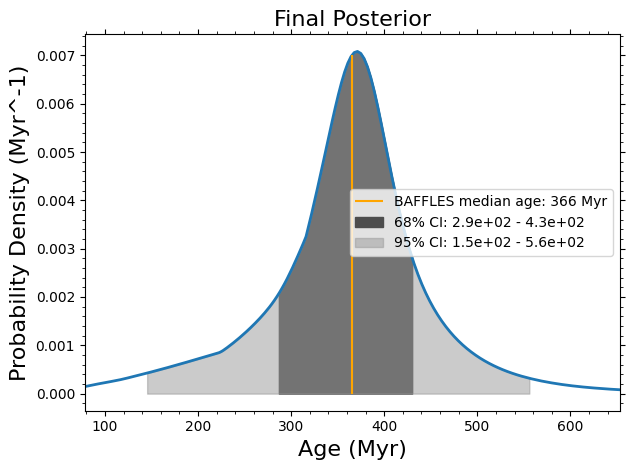

In [7]:
res = baffles_age(bv,rhk,li,bv_err,li_err,
            upperLim=False,
            maxAge=None,
            fileName='baffles',
            showPlots=False,
            savePlots=False, 
            savePostAsText=False
           )

[========================>] 100% ETA: 0:00:00
Finished 23 stars. Average time per star: 0.16 seconds.
Isochronal age exists within 61.298148 % CI


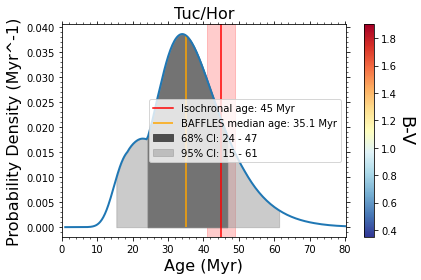

In [29]:
import readData
# Exmple 4: Lets compute a posterior product and save it as a pdf
tuchor_bmv, tuchor_li,tuchor_li_err = readData.tuchor()
baffles_li = age_estimator('lithium')
# pp = PdfPages("tuchor_example_product.pdf")
product = baffles_li.posterior_product(tuchor_bmv,
                                       tuchor_li,
                                       bv_errs=None,
                                       measure_err_arr=tuchor_li_err,
                                       showPlot=True,
                                       #showStars=True, 
                                       title='Tuc/Hor', 
                                       givenAge=45,
                                       givenErr=4)